# Classification model using Random Forest

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

### 2. Upload Clinic data

In [2]:
path ="../../../../Data_preprocessing/RNA_post_autoencoder/encoded_data_binary_43.csv"
data = pd.read_csv(path)
data.reset_index
data.round(4)
data=data.iloc[:,1:440  ] 
data.head()

,Target,0,1,2,3,4,5,6,7,8,...,33,34,35,36,37,38,39,40,41,42
0,1,0.153994,-0.164904,-0.452284,0.206749,-0.857082,-0.603124,-0.473103,-0.075513,0.054750,...,-0.037600,-0.128832,-0.385064,0.116692,1.490244,1.059520,-1.272441,0.110960,-0.101009,0.161909
1,1,-1.300332,-0.080441,-0.885911,-0.168431,-0.529857,0.184833,-0.464027,-0.361125,0.125864,...,-0.443480,-0.222192,-0.440740,-0.388554,0.997358,0.816687,-1.113903,0.362072,-0.397896,1.188868
2,1,-0.876637,0.587383,-0.925414,0.488304,-0.181991,0.184868,-0.708685,1.060296,0.210958,...,0.440405,0.441728,0.479298,-0.410674,-0.082885,1.063791,-0.764444,0.862694,0.316916,1.723327
3,0,-1.598357,0.092854,-0.473400,-0.009476,-1.107011,0.699234,-1.599456,-0.220610,0.247359,...,-0.878015,-0.766315,-0.725781,-0.124278,0.621617,1.027331,-1.433755,0.882461,0.018591,1.787526
4,1,-1.735836,0.207939,-0.211755,-0.703383,-0.802869,-0.273099,-1.267936,-0.063031,-0.612482,...,-0.671282,1.156629,1.303665,0.926794,0.740702,-0.010802,0.001432,1.500137,0.100971,0.812671


In [3]:
Y = data.Target # Target column

X = data.iloc[:,1:439] # I selected all the columns by removing the Unnamed column (row id) and the Target column.

print(X)
print('Numero de pacientes: ',len(Y))

            0         1         2         3         4         5         6  \
0    0.153994 -0.164904 -0.452284  0.206749 -0.857082 -0.603124 -0.473103   
1   -1.300332 -0.080441 -0.885911 -0.168431 -0.529857  0.184833 -0.464027   
2   -0.876637  0.587383 -0.925414  0.488304 -0.181991  0.184868 -0.708685   
3   -1.598357  0.092854 -0.473400 -0.009476 -1.107011  0.699234 -1.599456   
4   -1.735836  0.207939 -0.211755 -0.703383 -0.802869 -0.273099 -1.267936   
..        ...       ...       ...       ...       ...       ...       ...   
176 -1.222742  0.033713 -0.588393 -0.369282 -0.914620  0.613994 -1.088500   
177 -0.916295  0.632799  0.010232  1.049555 -0.321448 -0.182999 -1.356915   
178 -0.499931  0.487778 -0.365115 -0.074394 -0.231141  0.391114 -0.622813   
179 -0.790637  0.102222 -1.135601 -0.301596 -0.794871  0.188501 -0.760856   
180 -0.297094  0.420879 -0.209357  0.319454 -0.118073 -0.411617 -1.117591   

            7         8         9  ...        33        34        35  \
0  

### 3. Train-Test dataset split

In [4]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125, stratify=Y)

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


### 4. Select the parameters of the model and fit it

In [5]:
param_grid = {'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 3, 4, 5],
              'random_state':[125],
              'n_estimators': [10, 20],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy'],
              'max_depth':[None, 2, 5, 10,50]
              }

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(
        estimator  = RandomForestClassifier(),
        param_grid = param_grid,
        cv=5
       )

clf.fit(XTrain , yTrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 5, 10, 50],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 20], 'random_state': [125]})

In [6]:
print("Mejor estimación de parámetros según GridSearchCV:")
print(clf.best_estimator_)
model = clf.best_estimator_

Mejor estimación de parámetros según GridSearchCV:
RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=5,
                       min_samples_leaf=3, n_estimators=20, random_state=125)


In [7]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))


Best result of the cross validation of the model with the best paramters:0.6603448275862069


### 5. Prediction

In [8]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(XTrain)
contTrain = 0
yTrain=yTrain.to_numpy()

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [9]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(XTest)
contTest = 0
yTest=yTest.to_numpy()

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1


### 6. Results

In [10]:
print('Final accuracy on the training dataset:' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(yTest)))

Final accuracy on the training dataset:0.9305555555555556
Final accuracy on the testing dataset: 0.40540540540540543


In [11]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[68  0]
 [10 66]]
Input data:  [1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1
 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1]
Prediction:        [1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0
 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0
 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1
 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1]


In [12]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        68
           1       1.00      0.87      0.93        76

    accuracy                           0.93       144
   macro avg       0.94      0.93      0.93       144
weighted avg       0.94      0.93      0.93       144



In [13]:
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix(yTest,yhatTest))
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[ 6 11]
 [11  9]]
Input data:  [0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0]
Prediction:        [0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1]


In [14]:
print(classification_report(yTest,yhatTest))

              precision    recall  f1-score   support

           0       0.35      0.35      0.35        17
           1       0.45      0.45      0.45        20

    accuracy                           0.41        37
   macro avg       0.40      0.40      0.40        37
weighted avg       0.41      0.41      0.41        37



Features with relevance over 0:  42
Features with relevance over 0.05:  4


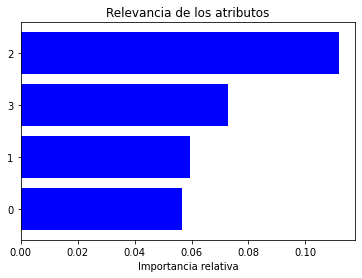

0 = 0.042110931427601826
1 = 0.006575909970757998
2 = 0.048830389279380194
3 = 0.018093162956171728
4 = 0.01228890015796033
5 = 0.019347184631977883
6 = 0.0066471909892440615
7 = 0.01580345004773106
8 = 0.05659594894346951
9 = 0.0595496750998886
10 = 0.011753873732794502
11 = 0.018834211231073556
12 = 0.00727513832616093
13 = 0.003239663813000119
14 = 0.005858297374097528
15 = 0.012526067730855617
16 = 0.02274795491617675
17 = 0.0313411968647923
18 = 0.017640586601883883
19 = 0.008529291057367386
20 = 0.00879209621011512
21 = 0.011861834772020463
22 = 0.03864014626365995
23 = 0.02240673930966484
24 = 0.009793543589365537
25 = 0.0289571477414671
26 = 0.0
27 = 0.0008846854334879064
28 = 0.028101142088330477
29 = 0.04182906854006894
30 = 0.019564901944200658
31 = 0.036365861820072024
32 = 0.004128439564063878
33 = 0.014604790010802721
34 = 0.014903605227682698
35 = 0.0021133140033716994
36 = 0.11192677894922523
37 = 0.04964807229621113
38 = 0.005077730616408033
39 = 0.019509756316533462
4

In [15]:
# Through the created model we can see which attributes are the most significant to make a decision.
# The most relevant attributes will be the ones placed at the top of the tree.
features = list(X)
importances = model.feature_importances_

elems_over_0 = np.fromiter((element for element in importances if element > 0), dtype = importances.dtype)
print('Features with relevance over 0: ', len(elems_over_0))

newArray = np.fromiter((element for element in importances if element > 0.05), dtype = importances.dtype)
importances=newArray
indices = np.argsort(importances)
print('Features with relevance over 0.05: ', len(newArray))

plt.title('Relevancia de los atributos')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia relativa')
plt.show()

for name, importance in zip(X, model.feature_importances_):
    print(name, "=", importance)

# Attributes whose relevance is 0, will not be necessary to make the prediction of the target.